## Observations and Insights 

1 - The distribution of genders is close to a 50/50 split. Thus, when looking at the data produced it is safe to assume that the drugs effect both genders similarly. However, in otder to prove this you would need to look at effects of each drug on female mice compared to thier male counterparts.

2 - Using both bar plots alongside the boxplot it can be infered that Capomulin and Ramicane behave similarly in terms of how long it takes to and how much they reduce tumour volume. They both perform better in comparison to the other drugs.

3 - There is a positive correation for the effect of the drug Capomulin on tumour volume and the weight of the mice. Indicating that as the weight of the mice increases there is a resulting increase in the average tumour volume.

In [40]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "/Users/salma/Desktop/Matplotlib/Pymaceuticals/data/Mouse_metadata.csv"
study_results_path = "/Users/salma/Desktop/Matplotlib/Pymaceuticals/data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combineddata = pd.merge(mouse_metadata, study_results, how="left", on="Mouse ID")


# Display the data table for preview
combineddata.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [41]:

# Checking the number of mice.
mice_total = combineddata["Mouse ID"].unique()


#Print mice total
len(mice_total)


249

In [42]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicated_mice = combineddata[combineddata.duplicated(["Mouse ID", "Timepoint"])]

#Print results
duplicated_mice

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [43]:
# Optional: Get all the data for the duplicate mouse ID. 
DuplicatedMiceData = combineddata.loc[(combineddata["Mouse ID"]=="g989")]

#Print Results
DuplicatedMiceData


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [44]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaneddata = combineddata.loc[(combineddata["Mouse ID"]!="g989")]

#Print results
cleaneddata

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [45]:
# Checking the number of mice in the clean DataFrame.
cleaneddata_length = cleaneddata["Mouse ID"].unique()

#Print results
len(cleaneddata_length)

248

## Summary Statistics

In [46]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

#Manipluating the data given.
sum_mean = cleaneddata.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
sum_median = cleaneddata.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
sum_variance = cleaneddata.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
sum_std = cleaneddata.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
sum_sem = cleaneddata.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()

#Creating dataframe
summary_dataframe = pd.DataFrame({"Mean": sum_mean,
                          "Median": sum_median,
                          "Variance": sum_variance,
                          "Standard Deviation": sum_std,
                          "SEM": sum_sem
                          })

#Print results
summary_dataframe


,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [47]:
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line

groupby_dataframe = combineddata.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg(["mean","median","var","std","sem"])

#Print results
groupby_dataframe   



,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

Change the names for the 2 barplots and double check its what it is asking for.

Text(0.5, 1.0, 'Number of Timepoints for All Mice Per Regimen')

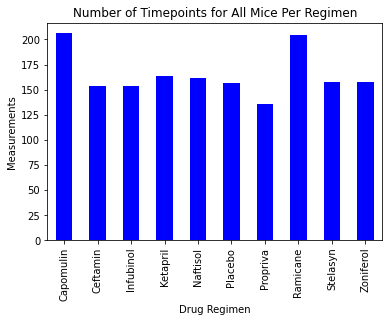

In [49]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
bar_panda = combineddata.groupby("Drug Regimen")["Tumor Volume (mm3)"].nunique().plot(kind = "bar", color = "blue")

#Print results
bar_panda

bar_panda.set_ylabel("Measurements")
bar_panda.set_title("Number of Timepoints for All Mice Per Regimen")


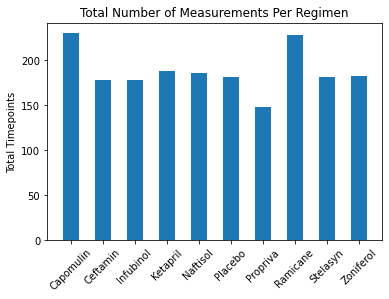

In [52]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

labels = ['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol',

           'Placebo', 'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol']


drug_regimen = (cleaneddata.groupby(["Drug Regimen"])["Mouse ID"].count()).tolist()

plt.bar(labels, drug_regimen, 0.5)
plt.ylabel("Total Timepoints")
plt.title("Total Number of Measurements Per Regimen")
plt.xticks(rotation = 45)
plt.show()



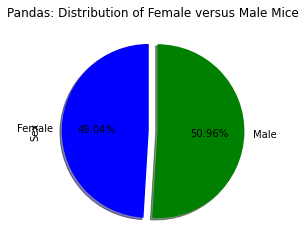

In [56]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

colors = ["blue","green"]
explode = (0.05,0.05)

pandas_gender_pieplot = cleaneddata.groupby("Sex")['Sex'].count()

pie= pandas_gender_pieplot.plot(kind='pie', y='Mouse ID', autopct='%1.2f%%', explode=explode, colors=colors, title = "Pandas: Distribution of Female versus Male Mice", startangle=90, shadow = True)
                                      


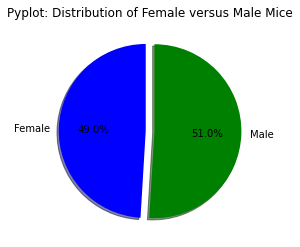

In [58]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

colors = ["blue","green"]
explode = (0.05,0.05)


pyplot_gender_pieplot = cleaneddata.groupby("Sex")['Sex'].count()

plt.pie(pyplot_gender_pieplot, autopct='%1.1f%%', explode=explode, colors=colors, startangle=90, shadow = True, labels = pyplot_gender_pieplot.index )
plt.title("Pyplot: Distribution of Female versus Male Mice")

#Result & get rid of text
plt.show()


## Quartiles, Outliers and Boxplots

change everything from this poitn on

In [60]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse

regimen_volume = cleaneddata.groupby(["Mouse ID"])["Timepoint"].max()
regimen_volume_dataframe = pd.DataFrame(regimen_volume)

regimen_volume_dataframe

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint

regimen_volume_dataframe = pd.merge(cleaneddata, regimen_volume_dataframe, on=('Mouse ID','Timepoint'), how='right')

#Result
regimen_volume_dataframe

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,a203,Infubinol,Female,20,23,45,67.973419,2
1,a251,Infubinol,Female,21,25,45,65.525743,1
2,a262,Placebo,Female,17,29,45,70.717621,4
3,a275,Ceftamin,Female,20,28,45,62.999356,3
4,a366,Stelasyn,Female,16,29,30,63.440686,1
...,...,...,...,...,...,...,...,...
243,z435,Propriva,Female,12,26,10,48.710661,0
244,z578,Ramicane,Male,11,16,45,30.638696,0
245,z581,Infubinol,Female,24,25,45,62.754451,3
246,z795,Naftisol,Female,13,29,45,65.741070,3


In [61]:
# Put treatments into a list for for loop (and later for plot labels)

treatments_list = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
treatments_list


['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

In [84]:

# Creating an empty list for loop to fill with tumor volume data (for plotting labels)
tumor_vol = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for rows in treatments_list:
    
    # Locating rows per regimenand to calcualte tumor volumes
    mice_tumor_volume = regimen_volume_dataframe.loc[regimen_volume_dataframe["Drug Regimen"]==rows]
    results = mice_tumor_volume["Tumor Volume (mm3)"]
    tumor_vol.append(results)
    
    
    # Calculating the LQ, UP, IQR and median
    quartiles = round(results.quantile([.25,.5,.75]),3)
    lower_quartile = round(quartiles[0.25],3)
    upper_quartile = round(quartiles[0.75],3)
    interquartile_range = round(upper_quartile - lower_quartile,3)

    
    #Determining the outliers
    lower_outlier = round(lower_quartile - (1.5*interquartile_range),3)
    upper_outlier = round(upper_quartile - (1.5*interquartile_range),3)
    
    # Printing the results
    print (f"----------------------------------------------------")
    print (f"{rows} Drug Regimen")
    print (f"----------------------------------------------------")
    print (f"Lower quartile of the tumor volume is: {lower_quartile}")
    print (f"Upper quartile of the tumor volume is: {upper_quartile}")
    print (f"Interquartile range of the tumor volume is: {interquartile_range}")
    print (f"The median value of the tumer volume is {quartiles[0.5]}")
    print (f"Anything below value {lower_outlier} could be outliers")
    print (f"Anything above value {upper_outlier} could be outliers/n")
    
    

----------------------------------------------------
Capomulin Drug Regimen
----------------------------------------------------
Lower quartile of the tumor volume is: 32.377
Upper quartile of the tumor volume is: 40.159
Interquartile range of the tumor volume is: 7.782
The median value of the tumer volume is 38.125
Anything below value 20.704 could be outliers
Anything above value 28.486 could be outliers/n
----------------------------------------------------
Ramicane Drug Regimen
----------------------------------------------------
Lower quartile of the tumor volume is: 31.56
Upper quartile of the tumor volume is: 40.659
Interquartile range of the tumor volume is: 9.099
The median value of the tumer volume is 36.562
Anything below value 17.911 could be outliers
Anything above value 27.01 could be outliers/n
----------------------------------------------------
Infubinol Drug Regimen
----------------------------------------------------
Lower quartile of the tumor volume is: 54.049
Uppe

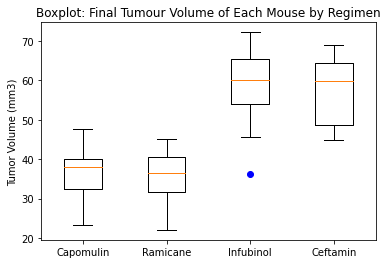

In [85]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
plt.boxplot(tumor_vol, sym ="b")
plt.xticks([1,2,3,4], treatments_list)
plt.ylabel("Tumor Volume (mm3)")
plt.title("Boxplot: Final Tumour Volume of Each Mouse by Regimen")

#Get rid of above text
plt.show()


## Line and Scatter Plots

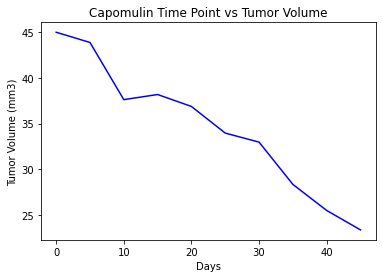

In [89]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
line_plot = cleaneddata.loc[cleaneddata["Mouse ID"]=="s185"]
plt.plot(line_plot["Timepoint"],line_plot["Tumor Volume (mm3)"], color="blue")

#Labels
plt.xlabel("Days")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin Time Point vs Tumor Volume")

#Gte rid of text
plt.show()


In [91]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
scatterplot = cleaneddata.loc[cleaneddata["Drug Regimen"]=="Capomulin"]

#Calcualting the average tumour volume
average_tumor_vol = pd.DataFrame(scatterplot.groupby("Mouse ID").mean())
average_tumor_vol

,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,
b128,9.0,22.0,22.5,41.963636,0.70
b742,7.0,21.0,22.5,40.083699,0.00
f966,16.0,17.0,10.0,36.505973,0.00
g288,3.0,19.0,22.5,41.990097,0.80
g316,22.0,22.0,22.5,44.613344,1.00
i557,1.0,24.0,22.5,44.805810,0.20
i738,23.0,20.0,22.5,39.141053,0.60
j119,7.0,23.0,22.5,44.465236,0.60
j246,21.0,21.0,17.5,43.216925,0.25


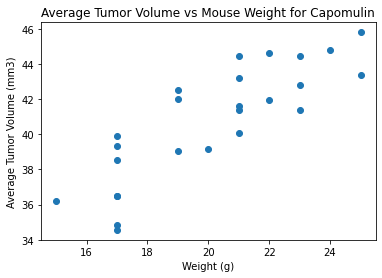

In [92]:
plt.scatter(average_tumor_vol["Weight (g)"],average_tumor_vol["Tumor Volume (mm3)"])


#Labels
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Average Tumor Volume vs Mouse Weight for Capomulin')


#Get rid of text above
plt.show()



## Correlation and Regression

In [20]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen


The Correlation Coefficient of te mouse weight vs average tumor volume for Capomulin regimen is 0.84


/var/folders/py/36ls70n51mz3l394gxc6ngmw0000gn/T/ipykernel_1223/2439357251.py:13: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-" (-> color='r'). The keyword argument will take precedence.
  plt.plot(x_value,line_of_best_fit,"r-", color='green')


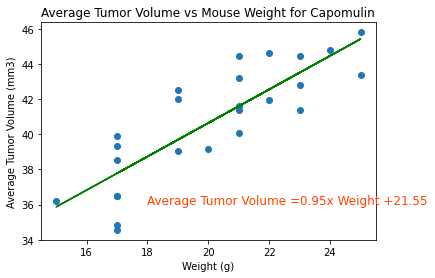

In [95]:

#x and Y values
x_value = scatterplot.groupby(scatterplot["Mouse ID"])["Weight (g)"].mean()
y_value = scatterplot.groupby(scatterplot["Mouse ID"])["Tumor Volume (mm3)"].mean()

#Setting up the regression line
slope,intercept, r_value, p_value, std_err = st.linregress(weight_mouse,volume_average)
line_of_best_fit = slope * weight_mouse + intercept
regression_equation = "Average Tumor Volume =" + str(round(slope,2)) + "x Weight +" + str(round(intercept,2))

#plotting results

plt.scatter(x_value,y_value)
plt.plot(x_value,line_of_best_fit,"r-", color='green')

#formatting the graph
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Average Tumor Volume vs Mouse Weight for Capomulin")
plt.annotate(regression_equation,(18,36),fontsize = 12, color = "orangered")

#Printing the correlation coeffecient
print(f"The Correlation Coefficient of te mouse weight vs average tumor volume for Capomulin regimen is {round(st.pearsonr(weight_mouse,volume_average)[0],2)}")